# Telecom Customer Churn Analysis

**Steps followed:**
1. Data Extraction.
2. Exploratory Data Analysis (EDA).
3. Handling duplicates & redundant data.
4. Handling missing data & inconsistencies.
5. Feature Engineering.
6. Detecting & Handling outliers.
7. Data Transformation (Encoding).
8. Discretization & Lookup Table.
9. Standardization & Normalization.
10. Data Export.

# 1 - Extraction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler

In [4]:
df= pd.read_csv(r'D:\Orange phase2\cell2celltrain.csv')
df.head(15)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [5]:
test = pd.read_csv(r'D:\Orange phase2\cell2cellholdout.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
df.describe(include='all')  

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,51047,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51047.000000,51047.000000,51047,51047.000000,51047,51047,51047,51047,51047,51047
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,16,2,7,4,8,3
top,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,Unknown,No,2-High,Other,Other,Unknown
freq,36336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50368,NaN,28982,49302,18993,24655,37637,19700
mean,NaN,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,0.052070,4.324524,NaN,0.053911,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,0.307592,3.138236,NaN,0.383147,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,5.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,0.000000,7.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


# 2- EDA with a bit of cleaning

In [6]:
df_new=df.copy()

In [7]:
test_new=test.copy()

In [198]:
def box_plot(x,data,title):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=x, data=data)
    plt.title(title)
    plt.show()

In [57]:
def plot_countplot_with_hue(data, x_col, hue_col, palette='Set2'):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x_col, hue=hue_col, data=data, palette=palette)
    plt.xlabel(f'{x_col.capitalize()}')
    plt.ylabel('Count')
    plt.title(f'{x_col.capitalize()} vs {hue_col.capitalize()}')
    plt.xticks(rotation=45)
    plt.legend(title=hue_col.capitalize(), loc='upper right')
    plt.tight_layout()
    plt.show()

In [190]:
def kde_plot(data,x,title, x_limit=None, y_limit=None, hue=None):
    
    plt.title(title)
    plot=sns.kdeplot(data=data, x=x, hue=hue, fill=True)
    if x_limit is not None:
        plot.set_xlim(x_limit)
    if y_limit is not None:
        plot.set_ylim(y_limit)
    plt.show()

In [66]:
def strip_plot(x, y, title, xlabel, ylabel, sample_size=None):
    if sample_size is not None and len(x) > sample_size:
        indices = random.sample(range(len(x)), sample_size)
        x = [x[i] for i in indices]
        y = [y[i] for i in indices]

    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,400)
    
    sns.stripplot(x=x, y=y, jitter=True, size=3)  # Adjust size as needed
    plt.show()

In [92]:
def plot_bar(data,title,xlabel=None,ylabel=None):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.barplot(x=data.index,y=data)
    plt.xticks(rotation=45)
    plt.show()

In [101]:
def barplot_with_hue(df, x_col, y_col, hue_col, title, x_label, y_label, legend_title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=legend_title, loc='upper right')
    plt.show()


In [105]:
def pie_chart(data, title, figsize=(8, 8), startangle=140, fontsize=14, labelsize=10):
    plt.figure(figsize=figsize)
    patches, texts, autotexts = plt.pie(data, labels=data.index, autopct='', startangle=startangle)

    # Adjusting label and percentage font size
    plt.title(title, fontsize=fontsize)
    plt.gca().tick_params(labelsize=labelsize)  # Adjust label font size

    # Create custom legend with percentages and colors
    percentages = [f'{p:.1f}%' for p in data / data.sum() * 100]
    plt.legend(patches, labels=[f'{data.index[i]} - {percentages[i]}' for i in range(len(data))], loc="best")

    plt.show()

In [108]:
def horizontal_bar_plot(data, x, y, hue, title, xlabel, ylabel, figsize=(10, 6), palette="muted", edgecolor=".3", legend_title='Legend', legend_loc='lower right'):
    sns.set(style="whitegrid")  # Use whitegrid style
    sns.set_context("talk")  # Adjust context for readability, can be "paper", "notebook", "talk", "poster"

    # Create horizontal bar plot with adjusted aesthetics
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, hue=hue, data=data, orient='h', palette=palette, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=legend_title, loc=legend_loc)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [119]:
def plot_kde_for_category(df, category_col, category_value, numeric_col):
  
    # Set up the figure size
    plt.figure(figsize=(10, 6))

    # Create KDE plot for the specified category value
    sns.kdeplot(data=df[df[category_col] == category_value][numeric_col], label=f'{category_col}: {category_value}', shade=True)

    # Add title and labels
    plt.title(f'KDE Plot of {numeric_col} for {category_col}: {category_value}')
    plt.xlabel(numeric_col)
    plt.ylabel('Density')

    # Show the plot
    plt.show()

In [42]:
def heat_map(data):
    # Filter numerical columns only
    numerical_data = data.select_dtypes(include=['number'])
    
    # Compute correlation matrix
    correlation = numerical_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(18, 12))  # Increase figsize for larger plot
    sns.heatmap(data=correlation, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=0.2,
                annot_kws={"fontsize": 10})  # Increase fontsize for annotations
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

**First, we'll start our analysis by inspecting the correlation between our numerical features.**

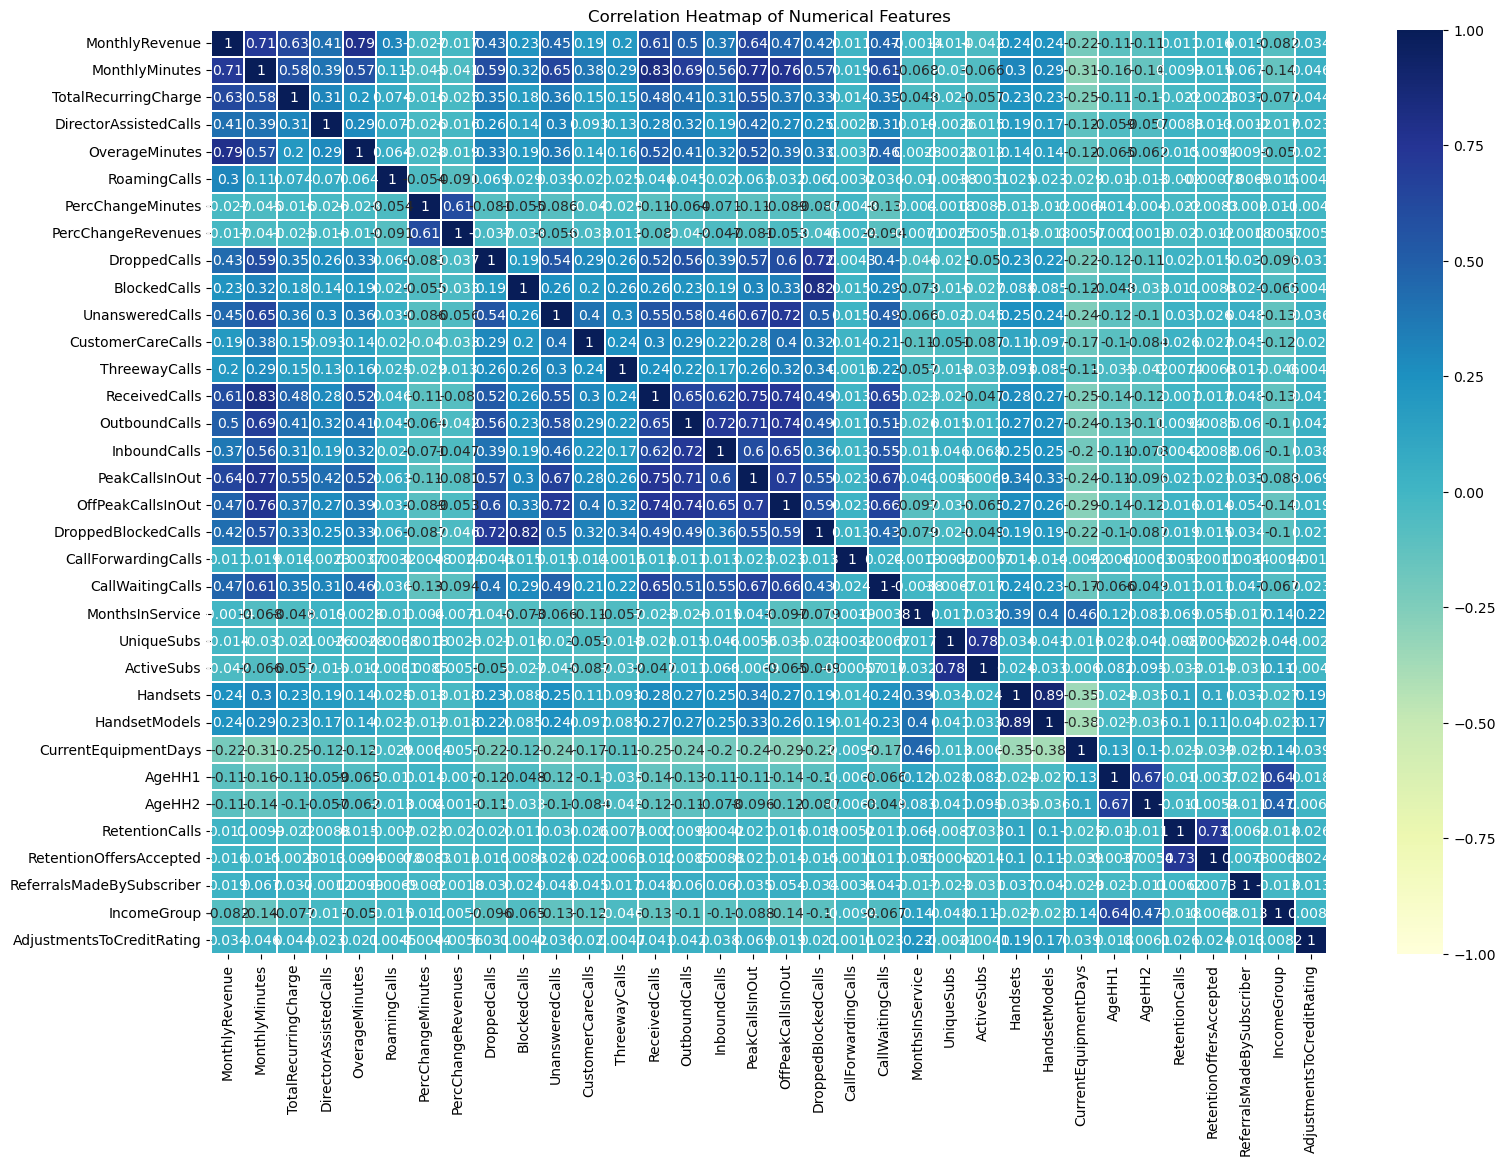

In [45]:
heat_map(df)

**Woah, that was quite chaotic!!!**

**However, after zooming in a bit, it becomes evident that certain columns exhibit relatively strong correlations, which will need attention in subsequent stages.**

#




**-And now we'd like to have a look at the correlation between these different numerical features and our target "Churn".**


**-Since Churn is a binary column "or can be converted to a binary one for now", we'd rather use the point biserial correlation instead of our normal correlation matrix & heat map.**


**-Where Point biserial correlation is a specific type of correlation coefficient used when one variable is dichotomous (binary) and the other is continuous.**

In [39]:
def plot_point_biserial_correlation(df):
    # Ensure 'Churn' is converted
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    numerical_cols.remove('Churn')  # Exclude the target column if it's in numerical_cols

    # Drop rows with NaN or inf values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    # Filter out constant columns
    numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]

    # Calculate Point Biserial Correlation for each numerical column
    correlations = {}
    for col in numerical_cols:
        corr, p_value = pointbiserialr(df['Churn'], df[col])
        correlations[col] = corr

    # Convert the results to a DataFrame for better visualization
    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Point Biserial Correlation'])
    correlation_df = correlation_df.sort_values(by='Point Biserial Correlation', ascending=False)

    # Display the correlation table
    print(correlation_df)

    # Plotting
    plt.figure(figsize=(12, 6))  # Set the figure size
    ax = sns.barplot(x='Point Biserial Correlation', y=correlation_df.index, data=correlation_df,
                     palette='YlGnBu', orient='h')

    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}", ((p.get_width() * 1.05), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black', fontsize=10)

    plt.title('Point Biserial Correlation with Churn')
    plt.xlabel('Point Biserial Correlation')
    plt.ylabel('Numerical Features')
    plt.tight_layout()
    plt.show()


                           Point Biserial Correlation
CurrentEquipmentDays                         0.102513
RetentionCalls                               0.058422
RetentionOffersAccepted                      0.034511
UniqueSubs                                   0.032839
MonthsInService                              0.017544
OverageMinutes                               0.015301
ActiveSubs                                   0.013049
PercChangeRevenues                           0.013015
RoamingCalls                                 0.010955
CallForwardingCalls                         -0.003161
BlockedCalls                                -0.004474
ReferralsMadeBySubscriber                   -0.011390
MonthlyRevenue                              -0.012065
DroppedBlockedCalls                         -0.012353
IncomeGroup                                 -0.012982
DroppedCalls                                -0.015062
AdjustmentsToCreditRating                   -0.016123
AgeHH2                      

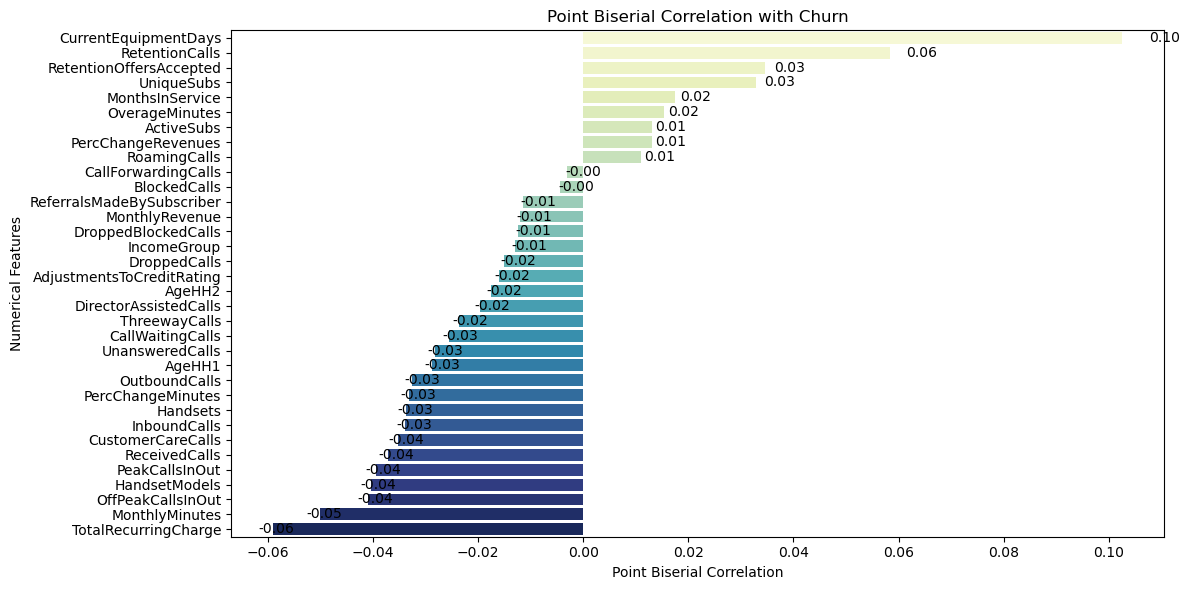

In [40]:
plot_point_biserial_correlation(df_new)


**We can easily observe that although many of the previous numerical features should be correlated to our target by sense, none of them actually does.**


**Correlations range between [-0.06, 0.10], which indicates very weak correlations.**

#





**Yet, let's make sure of the previous observation real quick using some visuals.**

**Two numerical features that are expected to  logically correlate with Churn are 'BlockedCalls' and 'RoamingCalls'."**

**As the number of blocked calls increases, that's supposed to indicate poor service quality and consequently probability of Churn should increase a well.**

**Similarly, as the number of roaming calls increases, this may indicate frequent travelling and may lead to higher bills & potential churn due to cost concerns.**

**So now, let's test the previous two hypotheses**

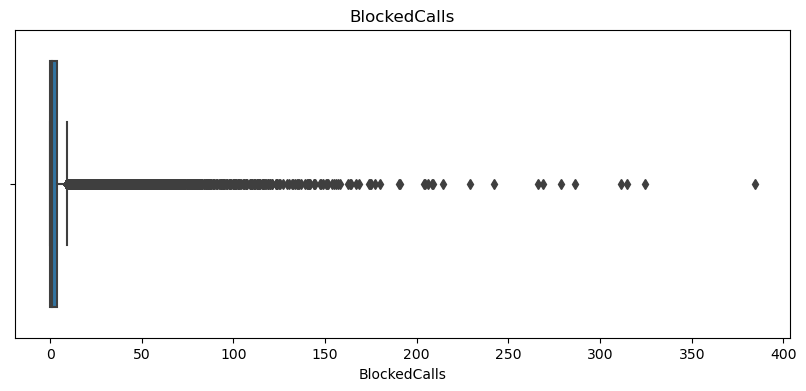

In [47]:
box_plot(df_new['BlockedCalls'],df_new,'BlockedCalls')

**We'll consider the max is 100 for now, 'and all outliers will be handled in later stages'.**

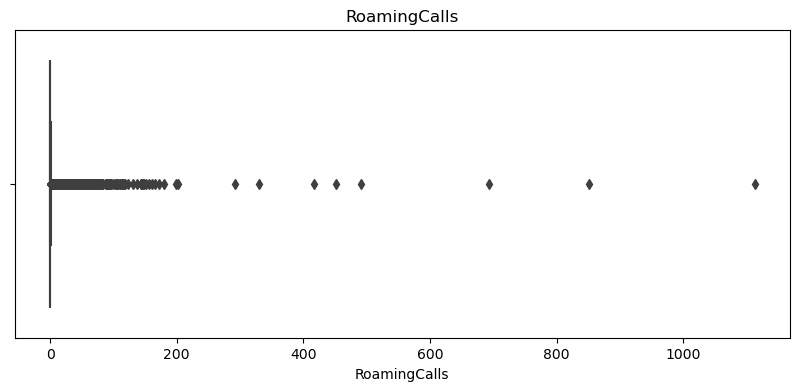

In [86]:
box_plot(df_new['RoamingCalls'],df_new,'RoamingCalls')

**We'll consider the max is 200 for now, 'and all outliers will be handled in later stages'.**

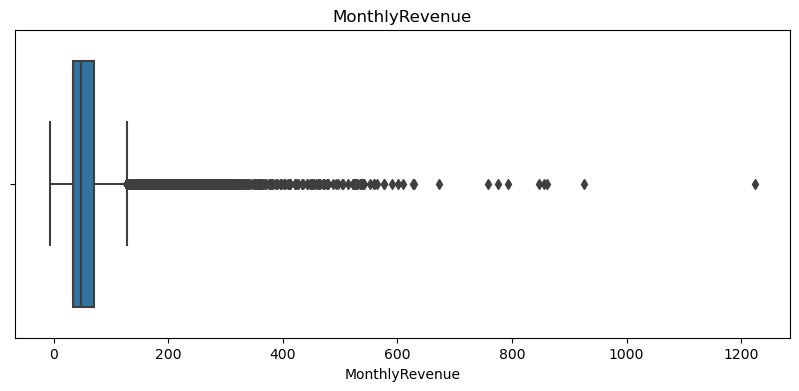

In [49]:
box_plot(df_new['MonthlyRevenue'],df_new,'MonthlyRevenue')

**We'll also consider here the max is 600 for now, 'and all outliers will be handled in later stages'.**

In [178]:
# Determine the maximum values for BlockedCalls/RoamingCalls and MonthlyRevenue

def plot_lmplot_with_hue(data,param_name, param_value, max_monthly_revenue):
    plt.figure(figsize=(10, 6))
    sns.lmplot(x=param_name, y='MonthlyRevenue', data=data, hue='Churn', scatter_kws={"s": 20})
    plt.title('Regression Plot of '+param_name+ ' vs MonthlyRevenue (with Churn as Hue)')
    plt.xlabel(param_name)
    plt.ylabel('Monthly Revenue')

    # Set the axis limits based on maximum values
    plt.xlim(0, param_value + 100)  # Adding 100 for some padding
    plt.ylim(0, max_monthly_revenue + 100)  # Adding 100 for some padding

    plt.show()


<Figure size 1000x600 with 0 Axes>

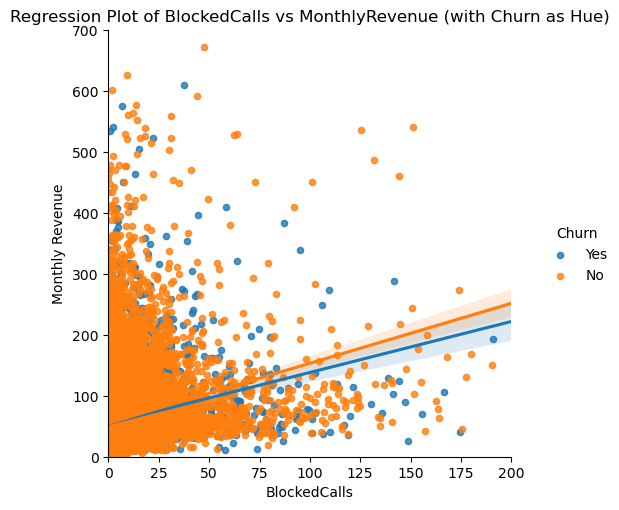

In [88]:
plot_lmplot_with_hue(df_new, param_name="BlockedCalls",param_value=100, max_monthly_revenue=600)

<Figure size 1000x600 with 0 Axes>

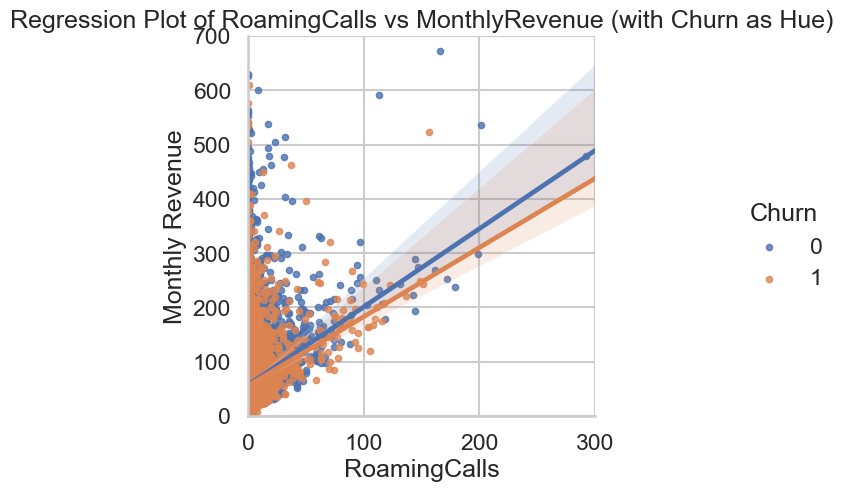

In [180]:
plot_lmplot_with_hue(df_new, param_name="RoamingCalls",param_value=200, max_monthly_revenue=600)


**In the previous two plots, as the number of calls increases, the probability of not churn is slightly higher than that of churn, which contradicts our previous hypothesis and aligns with the correlation results 'that these features give utterly weak correlations'.**

**Tried the previous plots with the numerical features that have relatively higher correlation with churn compared to the rest, yet no pattern was detected at all. In the end, all the correlations are quite weak.**

  -CurrentEquipmentDays
  
  -RetentionCalls
  
  -TotalRecurringCharge
  
  -MonthlyMinutes
  
  -And other lower correlations like: RetentionOffersAccepted
  
**However, as roaming and blocked calls increase, the monthly revenue increases.**

**ps: Trying to write everything in functions, to be easily used in scripts if needed later.**

**Before turning to the categorical columns, let's make again a couple of trials with the numerical ones.**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


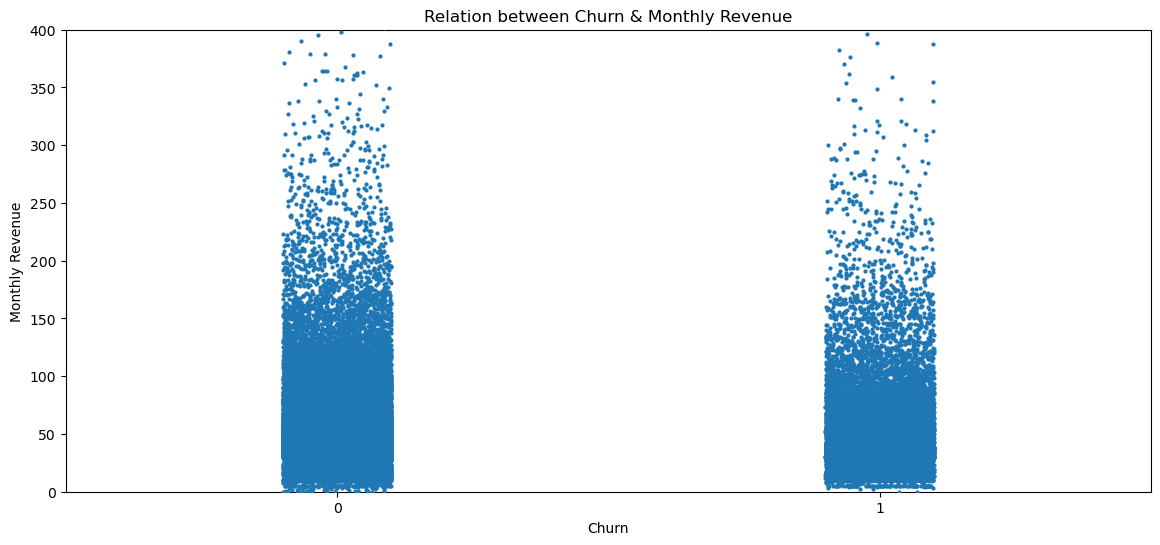

In [65]:
strip_plot(df_new['Churn'], df_new['MonthlyRevenue'], 'Relation between Churn & Monthly Revenue', 'Churn', 'Monthly Revenue')

**The probability of not churn slightly increases as monthly revenue increases, and that also supports out previous correlation 'small & negative correlation'.**

C:\Users\2018\AppData\Local\Temp\ipykernel_18372\1673194232.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df[category_col] == category_value][numeric_col], label=f'{category_col}: {category_value}', shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


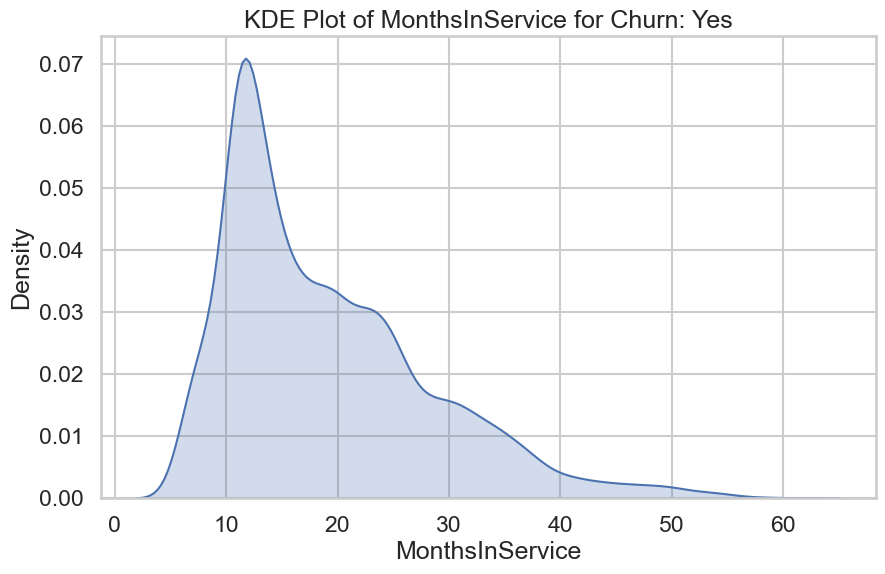

In [136]:
plot_kde_for_category(df_new, 'Churn', 'Yes', 'MonthsInService')

**We notice here there is a higher probability of churn within the first 10 to 15 months of service.**

**Retention Strategy: Focusing on customer engagement & retention efforts within the first 10-15 months might reduce churn rates.**

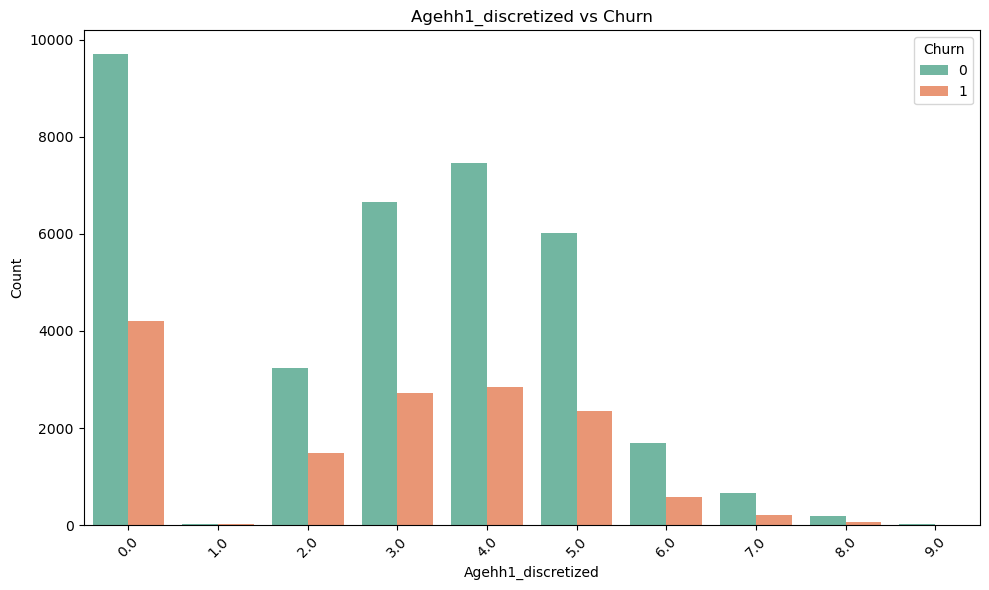

In [60]:
#We'll quickly discretize the agehh1 column for now.
df_new['AgeHH1_discretized'] = pd.cut(df_new['AgeHH1'], bins=10, labels=False)

# Plotting AgeHH1 discretized against Churn
plot_countplot_with_hue(df_new, x_col='AgeHH1_discretized', hue_col='Churn')

**There's no specific pattern to indicate a correlation between the age and the target.**

**However, we notice here that the count of not churn is ALWAYS higher than that of churn, that may raise awarness to a slight problem which is IMBALANCED data.**

In [61]:
# Count number of rows where Churn = 1
churn_count_yes = (df['Churn'] == 'Yes').sum()
churn_count_no = (df['Churn'] == 'No').sum()
churn_count_yes, churn_count_no

(14711, 36336)

**Indeed, the count of not churn is almost 2.5 times higher in this dataset.**

#



**Moving to the categorical columns**

In [74]:
#We'll create a function to analyze binary categorical columns in a DataFrame (`df`) excluding 'Churn',
#count occurrences of 'Churn' for each unique value where 'Churn' is 'Yes', and combine the results into a single table.

def binary_vs_churn_correlation (df):
    # Identify object columns, excluding 'Churn'
    object_cols = df.select_dtypes(include=['object']).columns.tolist()
    if 'Churn' in object_cols:
        object_cols.remove('Churn')

    # Filter object columns with only 'No' or 'Yes' values
    binary_object_cols = [col for col in object_cols if df[col].isin(['No', 'Yes']).all()]

    # Create a dictionary to store the results
    results = {}

    # Filter DataFrame for 'Churn' equal to 'Yes'
    df_churn_yes = df[df['Churn'] == "Yes"]

    # Iterate through filtered object columns and calculate counts for 'Churn'
    for col in binary_object_cols:
        churn_counts = df_churn_yes.groupby(col).size().sort_values(ascending=False)
        results[col] = churn_counts

    # Combine all results into a single DataFrame
    combined_table = pd.DataFrame(results)

    # Display the combined table
    print(combined_table)


In [77]:
binary_vs_churn_correlation (df_new)

     ChildrenInHH  HandsetRefurbished  HandsetWebCapable  TruckOwner  RVOwner  \
No          11052               12428               1868       12010    13536   
Yes          3659                2283              12843        2701     1175   

     BuysViaMailOrder  RespondsToMailOffers  OptOutMailings  NonUSTravel  \
No               9635                  9427           14494        13897   
Yes              5076                  5284             217          814   

     OwnsComputer  HasCreditCard  NewCellphoneUser  NotNewCellphoneUser  \
No          12002           4861             11950                12630   
Yes          2709           9850              2761                 2081   

     OwnsMotorcycle  MadeCallToRetentionTeam  
No            14496                    13925  
Yes             215                      786  


 **The previous output shows for Churn=Yes, the value counts of each binary feature.**

**Luckily, almost all the binary features are correlated to Churn.**

**Features exhibiting a positive correlation with churn (1,1), sorted in descending order of correlation strength:**

  -HandsetWebCapable 
  
  -HasCreditCard

**Features exhibiting a negative correlation with churn (0,1), sorted in descending order of correlation strength:**

  -OwnsMotorcycle
  
  -OptOutMailings
  
  -MadeCallToRetentionTeam
  
  -NonUSTravel
  
  -RVOwner
  
  -NotNewCellphoneUser
  
  -HandsetRefurbished
  
  -TruckOwner
  
  -OwnsComputer
  
  -NewCellphoneUser
  
  -ChildrenInHH
  
  -BuysViaMailOrder
  
  -RespondsToMailOffers

#



**Let's have a look at the rest of the categorical "non-binary" features.**

In [89]:
df['ServiceArea'].unique()
servicearea_vs_churn= df_new[['ServiceArea'] and df_new['Churn']=="Yes"].groupby('ServiceArea')['Churn'].count()

servicearea_vs_churn

ServiceArea
AIRAIK803     1
AIRAND864    11
AIRASH828     6
AIRAUG706    17
AIRBEA843     3
             ..
VAHCHL804     3
VAHMTN540     2
VAHRAD540     2
VAHROA540     7
VAHSTA540     1
Name: Churn, Length: 601, dtype: int64

In [90]:
df_new['ServiceArea'].nunique()

747

In [91]:
top_n=20
servicearea_vs_churn_topn = servicearea_vs_churn.nlargest(top_n)

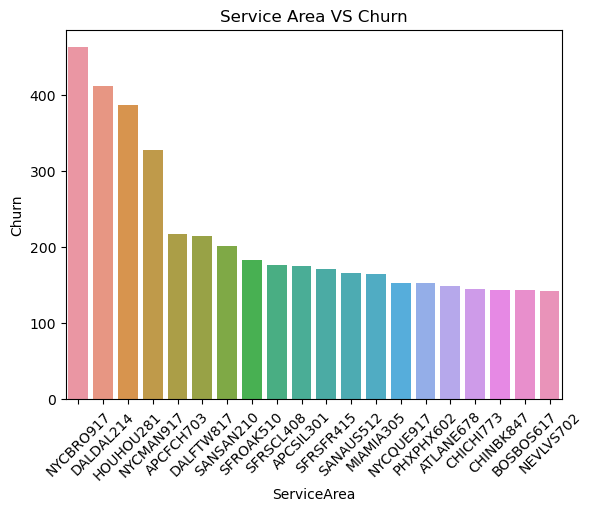

In [93]:
plot_bar(servicearea_vs_churn_topn,'Service Area VS Churn',
         'Service Area','Churn')

**These are the top 20 areas with the highest churn probability, so service area is undoubtedly a crucial factor here.**

In [98]:
def pivot_heatmap_plotting(pivot_table, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


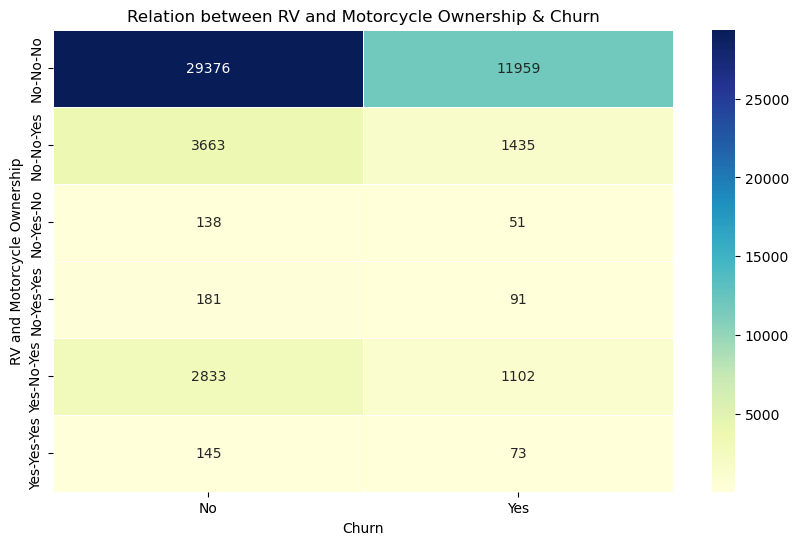

In [99]:
# Create a pivot table to count occurrences of each combination of OwnsRV, OwnsMotorcycle, and Churn
pivot_table = df.pivot_table(index=['RVOwner', 'OwnsMotorcycle', 'TruckOwner'], columns='Churn', aggfunc='size', fill_value=0)

# Plotting the heatmap for the relationship between OwnsRV, OwnsMotorcycle, and Churn
pivot_heatmap_plotting(pivot_table, 'Relation between RV and Motorcycle Ownership & Churn','Churn', 'RV and Motorcycle Ownership')



**An unsuccessful attempt to aggregate all vehicle data into a single value and compare it with churn, hindered by the imbalance where the number of non-churn instances consistently outweighs churn instances.**

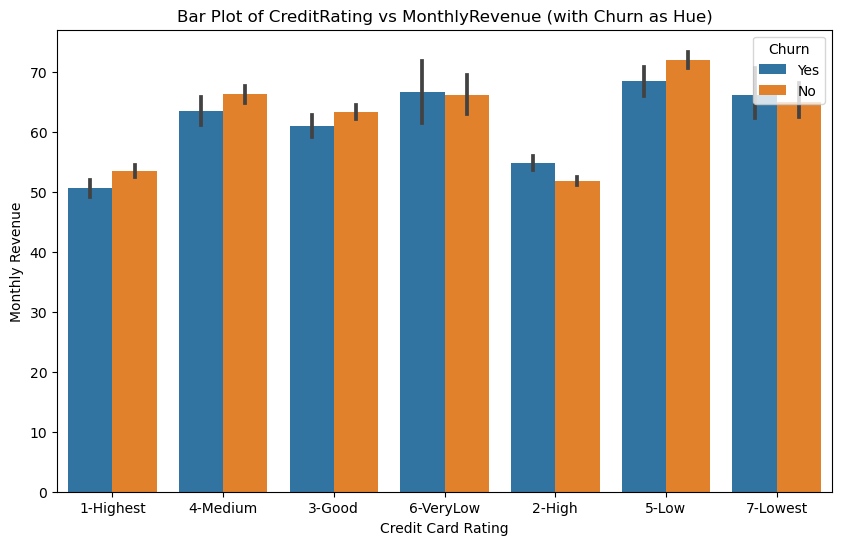

In [102]:
barplot_with_hue(df=df_new, x_col='CreditRating', y_col='MonthlyRevenue', hue_col='Churn', title='Bar Plot of CreditRating vs MonthlyRevenue (with Churn as Hue)',
x_label='Credit Card Rating', y_label='Monthly Revenue', legend_title='Churn'
)

**When credit card rating is 'High, Very low, Lowest', the probability of churn is slightly higher, not that much tho.**

In [103]:
df['Occupation'].value_counts()

Occupation
Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: count, dtype: int64

In [104]:
occupation_vs_churn = df_new[df_new['Churn'] == "Yes"].groupby('Occupation').size().sort_values(ascending=False)
print(occupation_vs_churn)


Occupation
Other           10932
Professional     2467
Crafts            426
Clerical          289
Self              243
Retired           185
Student           118
Homemaker          51
dtype: int64


C:\Users\2018\AppData\Local\Temp\ipykernel_18372\2849911623.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=[f'{data.index[i]} - {percentages[i]}' for i in range(len(data))], loc="best")


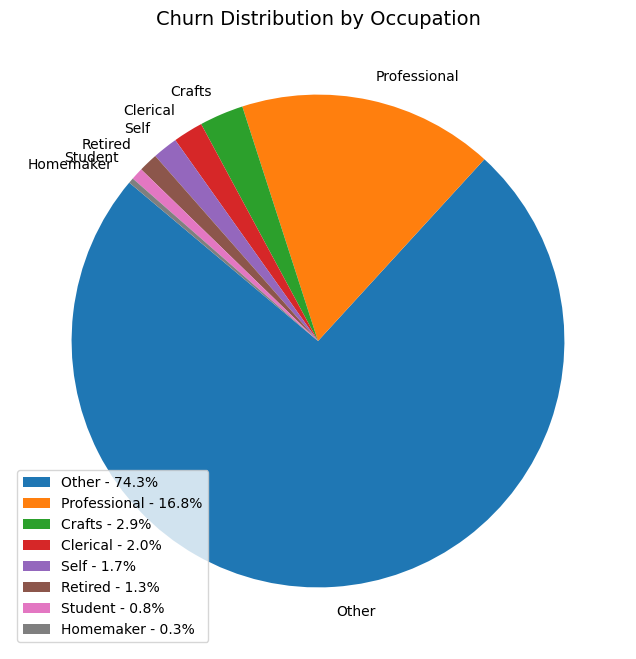

In [106]:
pie_chart(data=occupation_vs_churn, title='Churn Distribution by Occupation'
)

**Probability of churn for a professional is the highest, 'apart from the 'other' category'.**

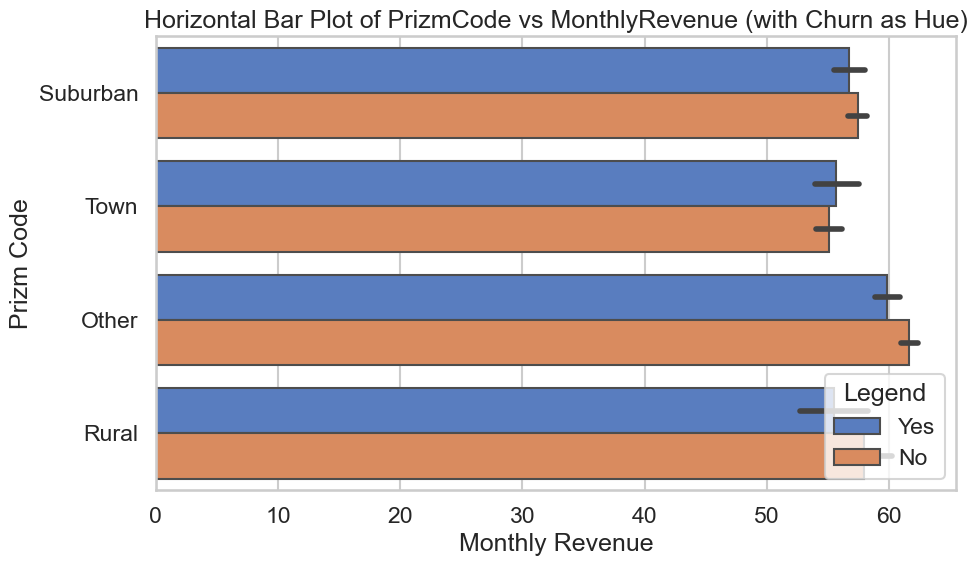

In [109]:
horizontal_bar_plot(
    data=df_new,
    x='MonthlyRevenue',
    y='PrizmCode',
    hue='Churn',
    title='Horizontal Bar Plot of PrizmCode vs MonthlyRevenue (with Churn as Hue)',
    xlabel='Monthly Revenue',
    ylabel='Prizm Code'
)


**Probability of churn in town is slightly higher, yet not helpful enough.**

In [110]:
crosstab_table = pd.crosstab(df['MaritalStatus'], df_new['Churn'])
crosstab_table

Churn,No,Yes
MaritalStatus,,
No,9255,3441
Unknown,13753,5947
Yes,13328,5323


**Probability of churn for single people is 27.10%, while it's around 28.54% for married ones. STILLLLLLLLL NOT HELPFUL!!!!**

In [111]:
IncomeGroup_vs_churn =df_new[df_new['Churn'] == "Yes"].groupby('IncomeGroup').size().sort_values(ascending=False)

IncomeGroup_vs_churn

IncomeGroup
0    3880
6    2724
7    1751
9    1569
5    1205
4    1121
3     787
8     725
1     594
2     355
dtype: int64

**The highest number of churn customers is recorded for those with income category '0' which is kinda expected.**

**But surprisingly, it's then followed by category groups 6,7 & 9 which are people with high income, apparently those people have They may have higher expectations for service quality and more financial flexibility to afford to switch to potentially better services.**

In [112]:
df_new[df_new['Churn'] == 'Yes']['HandsetPrice'].value_counts()


HandsetPrice
Unknown    8745
30         1980
150        1112
130         542
80          540
10          510
60          489
200         354
100         333
40           79
400          11
250           9
180           3
300           2
240           1
500           1
Name: count, dtype: int64

**Although the handset price is a numerical column, it has a limited set of values.**

**Customers who own handsets of prices around 30 & 150, are more prone to churn.**

#




**And by this, we've almost inspected the relation between our target and all our numerical & categorical columns.**


**To summarize the insights we have gathered thus far. The columns that are mostly correlated to the 'Churn' column are:**

| Categorical Columns | Numerical Columns |
|-----------------|------------------|
| All the binary columns    | MonthlyRevenue   |
| ServiceArea    | HandsetPrice   |
| Occupation     |           MonthsInService     |
| IncomeGroup     |                |


**All the binary columns. 'Whose values are either yes or no, we converted them quickly to 0s and 1s.**

**And these numerical columns don't help this much tho.**

#




**Last part in our EDA process:**

 -We'll try to gather some basic insights.

In [8]:
df_new['Churn'] = df_new['Churn'].map({'Yes': 1, 'No': 0})

In [163]:
df_new['Churn'].mean()

0.2881853977706819

In [173]:
columns_to_show = ["MonthlyMinutes", "CurrentEquipmentDays"]
df_new.groupby(["Churn"])[columns_to_show].describe(percentiles=[])


MonthlyMinutes                                              \
               count        mean         std  min    50%     max   
Churn                                                              
0            36250.0  542.546483  538.816505  0.0  381.0  7359.0   
1            14641.0  483.827471  504.634392  0.0  330.0  5410.0   

      CurrentEquipmentDays                                              
                     count        mean         std  min    50%     max  
Churn                                                                   
0                  36335.0  363.801156  249.334338 -5.0  310.0  1812.0  
1                  14711.0  421.903881  259.940076 -4.0  366.0  1779.0

**Obviously, the mean value of monthly minutes is higher for non-churned customers & the mean of cuurent equipment days is larger for churned customers.**

**ENOUGH WITH THE EDA!!!!!!**

#




# 3- Handling duplicates and Redundant data


In [1]:
def drop_duplicates(df):
    df=df.drop_duplicates()
    return df

In [9]:
duplicates=df_new[df_new.duplicated()]
print(duplicates)
print(df_new.duplicated().sum())

Empty DataFrame
Columns: [Churn, MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls, PercChangeMinutes, PercChangeRevenues, DroppedCalls, BlockedCalls, UnansweredCalls, CustomerCareCalls, ThreewayCalls, ReceivedCalls, OutboundCalls, InboundCalls, PeakCallsInOut, OffPeakCallsInOut, DroppedBlockedCalls, CallForwardingCalls, CallWaitingCalls, MonthsInService, UniqueSubs, ActiveSubs, ServiceArea, Handsets, HandsetModels, CurrentEquipmentDays, AgeHH1, AgeHH2, ChildrenInHH, HandsetRefurbished, HandsetWebCapable, TruckOwner, RVOwner, Homeownership, BuysViaMailOrder, RespondsToMailOffers, OptOutMailings, NonUSTravel, OwnsComputer, HasCreditCard, RetentionCalls, RetentionOffersAccepted, NewCellphoneUser, NotNewCellphoneUser, ReferralsMadeBySubscriber, IncomeGroup, OwnsMotorcycle, AdjustmentsToCreditRating, HandsetPrice, MadeCallToRetentionTeam, CreditRating, PrizmCode, Occupation, MaritalStatus]
Index: []

[0 rows x 57 columns]
0


**Apparently we've got no duplicates to drop at all.**



**And now, although we said before we'll handle the highly correlated data later, there are two columns that are polar opposites of each other and one of them should be eliminated instantly.**

In [9]:
df_new = df_new.drop(['NotNewCellphoneUser','OffPeakCallsInOut','CustomerID'], axis=1)

In [10]:
test_new = test_new.drop(['OffPeakCallsInOut','CustomerID','NotNewCellphoneUser'], axis=1)

In [70]:
df_new.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'Adjust

# 4- Handling missing data & inconsistencies

In [5]:
perc_mean_null=df_new.isnull().mean()*100
perc_mean_null

Churn                        0.000000
MonthlyRevenue               0.305601
MonthlyMinutes               0.305601
TotalRecurringCharge         0.305601
DirectorAssistedCalls        0.305601
OverageMinutes               0.305601
RoamingCalls                 0.305601
PercChangeMinutes            0.718945
PercChangeRevenues           0.718945
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea                  0.047015
Handsets    

**Upon examining these percentages of missing data, it's immediately apparent that they are quite minimal, allowing us to use Complete Case Analysis (CCA) with ease.**

**However, it's also evident that many columns have identical missing percentages down to the decimal, which strongly suggests that the data is not missing at random. Consequently, we should avoid using CCA and instead opt for imputation with the median, especially since all the percentages are below 5%.**

In [6]:
df_new['MonthlyRevenue'].isnull().sum()

156

**Right off the bat, it's not surprising that 'MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, and RoamingCalls' share the same missing percentages, as these fields are clearly related in some way.**

**However, let's investigate if they depend on other factors as well.**

In [125]:
df_new[df_new['MonthlyRevenue'].isnull()]['RetentionOffersAccepted'].value_counts()


RetentionOffersAccepted
0    151
1      5
Name: count, dtype: int64

In [10]:
df_new[df_new['RoamingCalls'].isnull()]['RetentionOffersAccepted'].value_counts()


RetentionOffersAccepted
0    151
1      5
Name: count, dtype: int64

**It's evident that the missing records of the 6 columns are the same.**

**And those to denied all the retention offers have a much higher probability of missing values in the MonthlyRevenue and the rest.**

**Customers who are at risk of churning might not respond to retention efforts and might have inconsistent usage patterns, resulting in missing or incomplete billing data.**

In [11]:
df_new[df_new['MonthlyRevenue'].isnull()]['CustomerCareCalls'].value_counts()


CustomerCareCalls
0.0     119
0.3      11
1.7       5
2.7       4
0.7       4
1.0       4
1.3       3
3.0       2
9.0       1
2.0       1
5.0       1
33.3      1
Name: count, dtype: int64

**Customers who do not reach out to customer care may be less engaged or inactive. They might not check their bills frequently or update their account information, leading to missing revenue data.**

In [14]:
df_new[df_new['MonthlyRevenue'].isnull()]['AdjustmentsToCreditRating'].value_counts()


AdjustmentsToCreditRating
0    144
1      9
2      2
7      1
Name: count, dtype: int64

**Customers with inactive accounts might not generate monthly revenue for the company, leading to missing MonthlyRevenue data. These inactive accounts are also less likely to have adjustments to credit ratings since there are no recent transactions or changes in their status**

In [9]:
df_new[df_new['RoamingCalls'].isnull()]['NonUSTravel'].value_counts()


NonUSTravel
No     148
Yes      8
Name: count, dtype: int64

**Customers who do not travel outside the US are less likely to incur roaming charges. As a result, the RoamingCalls data for these customers may be missing because they simply do not use the service.**

**And by this we can see that the missing values aren't at random.**

#



**Similarly, PercChangeMinutes and PercChangeRevenue also share the same missing percentage, which is not surprising given their positive correlation. This is evident from our previous correlation matrix and makes logical sense.**

In [17]:
df_new[df_new['PercChangeRevenues'].isnull()]['RetentionOffersAccepted'].value_counts()


RetentionOffersAccepted
0    357
1     10
Name: count, dtype: int64

**Highly dependant on the 'RetentionOffersAccepted' as well.**

**This may occur because customers with missing PercChangeRevenue data might not have engaged with the service long enough to trigger a revenue change or receive retention offers.**

#



**Moving to 'Handsets', 'HandsetModels', and 'CurrentEquipmentDays', any missing value in the 'Handsets' column will result in the corresponding details in the other two columns also being missing.**

In [24]:
df_new[df_new['Handsets'].isnull()]['AgeHH1'].value_counts()


AgeHH1
0.0    1
Name: count, dtype: int64

**The only instance where those values are missing is when the age equals 0, which likely indicates an issue with the record itself.**

#



**Moving to 'AgeHH1 & AgeHH2', they're also highly correlated.**

In [18]:
df_new[df_new['AgeHH1'].isnull()]['ActiveSubs'].value_counts()


ActiveSubs
1    629
2    180
3     55
4     26
6      7
5      6
8      2
7      2
9      1
0      1
Name: count, dtype: int64

In [23]:
df_new[df_new['AgeHH2'].isnull()]['ChildrenInHH'].value_counts()


ChildrenInHH
No    909
Name: count, dtype: int64

**These values are all missing when there are no children in the household and mostly missing when no. of active subscribers is 1.**

#

**By this, we've made sure that these values aren't missing at random.**

**Now, it's time for imputation.**

In [11]:
def impute_missing_with_median(df):
    for column in df.columns:
        if column != 'ServiceArea' and df[column].isnull().sum() > 0:
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)


In [12]:
impute_missing_with_median(df_new)

In [13]:
impute_missing_with_median(test_new)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [598]:
perc_mean_null=df_new.isnull().mean()*100
perc_mean_null

Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.000000
PercChangeRevenues           0.000000
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea                  0.047015
Handsets    

#


**The only remaining field with missing values is the ServiceArea.**

In [27]:
for col in df_new.columns:
   
        print(df_new[df_new['ServiceArea'].isnull()][col].value_counts())
        print()


Churn
0    12
1    12
Name: count, dtype: int64

MonthlyRevenue
46.10     1
53.01     1
51.15     1
35.52     1
7.17      1
60.00     1
65.78     1
106.28    1
132.83    1
40.89     1
176.97    1
32.08     1
135.07    1
58.67     1
44.94     1
30.27     1
34.83     1
68.75     1
17.90     1
79.92     1
76.52     1
109.29    1
61.45     1
33.41     1
Name: count, dtype: int64

MonthlyMinutes
203.0     1
461.0     1
1510.0    1
92.0      1
112.0     1
240.0     1
1678.0    1
1596.0    1
1053.0    1
241.0     1
1194.0    1
78.0      1
1312.0    1
714.0     1
270.0     1
28.0      1
297.0     1
635.0     1
191.0     1
318.0     1
441.0     1
1000.0    1
950.0     1
779.0     1
Name: count, dtype: int64

TotalRecurringCharge
30.0     5
60.0     3
45.0     2
75.0     2
10.0     2
42.0     2
38.0     1
73.0     1
44.0     1
100.0    1
85.0     1
56.0     1
7.0      1
50.0     1
Name: count, dtype: int64

DirectorAssistedCalls
0.00     8
0.25     6
0.50     2
1.49     1
4.95     1
0.99     1
5

**Upon further inspection, it appears that those missing data do not depend on any other features that logically correlate with them. Therefore, we will assume they are missing at random and proceed with Complete Case Analysis (CCA).**

In [14]:
df_cleaned = df_new.dropna(subset=['ServiceArea'])

In [9]:
perc_mean_null=df_cleaned.isnull().mean()*100
perc_mean_null

Churn                        0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1                       0.0
AgeHH2    

**PERFECTO!**

#



**Note that both 'MaritalStatus' & 'HandsetPrice' are already imputed with 'Unknown'.**

In [46]:
df_cleaned['MaritalStatus'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [165]:
df_cleaned['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

**For the MaritalStatus, it's okay since it's already a categorical feature.**

**Regarding the HandsetPrice, this imputation turned the column from integer to object, hence we need to substitute it with a more suitable value.**

In [15]:
unknown_count = df_cleaned[df_cleaned['HandsetPrice'] == 'Unknown'].shape[0]
total_count = df_cleaned.shape[0]

# Calculating percentage of rows where 'HandsetPrice' is 'Unknown'
percentage_unknown = (unknown_count / total_count) * 100

print(f"Percentage of rows where HandsetPrice is Unknown: {percentage_unknown:.2f}%")


Percentage of rows where HandsetPrice is Unknown: 56.78%


**We'll substitute it with a value outside this column;s range, 0 for instance.**

In [16]:
df_cleaned.loc[df_cleaned['HandsetPrice'] == 'Unknown', 'HandsetPrice'] = 0

In [18]:
test_cleaned=test_new.copy()
test_cleaned.loc[test_cleaned['HandsetPrice'] == 'Unknown', 'HandsetPrice'] = 0

In [439]:
df_cleaned['HandsetPrice'].unique()

array(['30', 0, '10', '80', '150', '300', '40', '200', '100', '130', '60',
       '400', '240', '250', '180', '500'], dtype=object)

**Convert it to int.**

In [19]:
df_cleaned['HandsetPrice']=df_cleaned['HandsetPrice'].astype('int64')

C:\Users\2018\AppData\Local\Temp\ipykernel_11920\2337933408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HandsetPrice']=df_cleaned['HandsetPrice'].astype('int64')


In [20]:
test_cleaned['HandsetPrice']=test_cleaned['HandsetPrice'].astype('int64')

In [21]:
df_cleaned['HandsetPrice'].dtype

dtype('int64')

#


In [14]:
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    print(col)
    print(df_cleaned[col].min())

Churn
0
MonthlyRevenue
-6.17
MonthlyMinutes
0.0
TotalRecurringCharge
-11.0
DirectorAssistedCalls
0.0
OverageMinutes
0.0
RoamingCalls
0.0
PercChangeMinutes
-3875.0
PercChangeRevenues
-1107.7
DroppedCalls
0.0
BlockedCalls
0.0
UnansweredCalls
0.0
CustomerCareCalls
0.0
ThreewayCalls
0.0
ReceivedCalls
0.0
OutboundCalls
0.0
InboundCalls
0.0
PeakCallsInOut
0.0
OffPeakCallsInOut
0.0
DroppedBlockedCalls
0.0
CallForwardingCalls
0.0
CallWaitingCalls
0.0
MonthsInService
6
UniqueSubs
1
ActiveSubs
0
Handsets
1.0
HandsetModels
1.0
CurrentEquipmentDays
-5.0
AgeHH1
0.0
AgeHH2
0.0
RetentionCalls
0
RetentionOffersAccepted
0
ReferralsMadeBySubscriber
0
IncomeGroup
0
AdjustmentsToCreditRating
0
HandsetPrice
0


**We printed the minimum values for each column to search for any other inconsistencies.**

**We notice that the min value for both AgeHH1 & AgeHH2 is 0, highlighting that NAN values here are probably imputed with 0s.**

**TotalRecurringCharge and MonthlyRevenue can sometimes be negative due to adjustments, refunds, discounts, or write-offs, reflecting deductions or losses in revenue related to customer billing, contractual allowances, or promotional activities**

**Percentage change in both revenues and minutes can certainly be negative as well.**

**The only question mark here is the negative values in the 'CurrentEquipmentDays' column.**


In [171]:
df_cleaned[df_cleaned['CurrentEquipmentDays']<0].size

4256

**Substitute them with 0s.**

In [22]:
df_cleaned['CurrentEquipmentDays'] = np.where(df_cleaned['CurrentEquipmentDays'] < 0, 0, df_cleaned['CurrentEquipmentDays'])


C:\Users\2018\AppData\Local\Temp\ipykernel_11920\3314982943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CurrentEquipmentDays'] = np.where(df_cleaned['CurrentEquipmentDays'] < 0, 0, df_cleaned['CurrentEquipmentDays'])


In [23]:
test_cleaned['CurrentEquipmentDays'] = np.where(test_cleaned['CurrentEquipmentDays'] < 0, 0, test_cleaned['CurrentEquipmentDays'])


In [24]:
df_cleaned[df_cleaned['CurrentEquipmentDays']<0].size

0

#






**Upon re-reviewing our df_cleaned.info(), we observe that columns representing duration in days or minutes, are of type float. However it's preferable to round them to the nearest whole number.**

**As for age, it is typically rounded to the nearest whole number as well.**

**The same applies to the columns 'Handsets' and 'HandsetModels', which represent counts and are already integers, shouldn't be of type float.**

**For columns labeled with "calls" in their names, they likely represent either the mean count of calls or the mean duration in minutes. In both cases it's preferable to keep these columns as float because many values, such as 0.3 or 0.4, are small. Converting them to integers would result in all values becoming zero, potentially losing valuable perspectives or insights.**

**Therefore, any column containing "Calls", "Age,", "Minutes" or "Days" as well as the Handsets and HandsetModels columns, will be converted to int.**

In [25]:
keywords = ['age', 'handset', 'minute', 'day']

# a list of columns whose names contain any of the specified keywords, are of type float, and exclude 'OverageMinutes'
columns_to_convert = [col for col in df_cleaned.columns if any(keyword.lower() in col.lower() for keyword in keywords) 
                    and df_cleaned[col].dtype == 'float64']

print(columns_to_convert)


['MonthlyMinutes', 'OverageMinutes', 'PercChangeMinutes', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']


In [26]:
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype('int64')

C:\Users\2018\AppData\Local\Temp\ipykernel_11920\2931090638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype('int64')


In [27]:
test_cleaned[columns_to_convert] = test_cleaned[columns_to_convert].astype('int64')

In [724]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51023 entries, 3000002 to 3399994
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51023 non-null  object 
 1   MonthlyRevenue             51023 non-null  float64
 2   MonthlyMinutes             51023 non-null  int64  
 3   TotalRecurringCharge       51023 non-null  float64
 4   DirectorAssistedCalls      51023 non-null  float64
 5   OverageMinutes             51023 non-null  int64  
 6   RoamingCalls               51023 non-null  float64
 7   PercChangeMinutes          51023 non-null  int64  
 8   PercChangeRevenues         51023 non-null  float64
 9   DroppedCalls               51023 non-null  float64
 10  BlockedCalls               51023 non-null  float64
 11  UnansweredCalls            51023 non-null  float64
 12  CustomerCareCalls          51023 non-null  float64
 13  ThreewayCalls              51023 non-null  

**Bingo! the only float columns are those of revenues & charges which totally makes sense, in addition to the calls which we discussed earlier why we'll leave them as float.**

#



# 5- Feature Engineering

**First, we will consolidate 'RVOwner', 'TruckOwner', and 'OwnsMotorcycle' into a new field named 'VehicleOwner', which will be set to 'Yes' if any of the three fields contains 'Yes'. Subsequently, we will remove these fields to optimize storage.**

In [28]:
df_cleaned['VehicleOwner'] = df_cleaned[['RVOwner', 'TruckOwner', 'OwnsMotorcycle']].apply(lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1)


C:\Users\2018\AppData\Local\Temp\ipykernel_11920\202529779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['VehicleOwner'] = df_cleaned[['RVOwner', 'TruckOwner', 'OwnsMotorcycle']].apply(lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1)


In [29]:
test_cleaned['VehicleOwner'] = test_cleaned[['RVOwner', 'TruckOwner', 'OwnsMotorcycle']].apply(lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1)

In [19]:
df_cleaned['VehicleOwner'].value_counts()

VehicleOwner
No     41323
Yes     9700
Name: count, dtype: int64

In [30]:
df_cleaned=df_cleaned.drop(['RVOwner','TruckOwner','OwnsMotorcycle'],axis=1)

In [31]:
test_cleaned=test_cleaned.drop(['RVOwner','TruckOwner','OwnsMotorcycle'],axis=1)

In [180]:
df_cleaned.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted',
       'NewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToR

#



**We'll also create another feature called 'Tech-Savviness Score', based on a combination of owning a computer, handset web capability, and responding to mail offers. It could aim to reflect the subscriber's engagement with technology and their response to digital interactions.**

In [32]:
computer_condition = df_cleaned['OwnsComputer'] == 'Yes'
web_capability_condition = df_cleaned['HandsetWebCapable'] == 'Yes'
responds_to_mail_condition = df_cleaned['RespondsToMailOffers'] == 'Yes'

# Calculating the Tech-Savviness Score
df_cleaned['TechSavvinessScore'] = (computer_condition.astype(int) +
                                    web_capability_condition.astype(int) +
                                    responds_to_mail_condition.astype(int))

print(df_cleaned[['OwnsComputer', 'HandsetWebCapable', 'RespondsToMailOffers', 'TechSavvinessScore']].head())


  OwnsComputer HandsetWebCapable RespondsToMailOffers  TechSavvinessScore
0          Yes               Yes                  Yes                   3
1          Yes                No                  Yes                   2
2           No                No                   No                   0
3           No               Yes                  Yes                   2
4          Yes                No                  Yes                   2


In [33]:
test_cleaned['TechSavvinessScore'] = (computer_condition.astype(int) +
                                    web_capability_condition.astype(int) +
                                    responds_to_mail_condition.astype(int))

In [34]:
df_cleaned=df_cleaned.drop(['OwnsComputer', 'HandsetWebCapable', 'RespondsToMailOffers'],axis=1)

In [35]:
test_cleaned=test_cleaned.drop(['OwnsComputer', 'HandsetWebCapable', 'RespondsToMailOffers'],axis=1)

In [184]:
df_cleaned.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'Homeownership', 'BuysViaMailOrder', 'OptOutMailings', 'NonUSTravel',
       'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted',
       'NewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'Ma

#


**Finally, we'd better drop the 'BlockedCalls' & 'DroppedCalls' since they're obviously ised in calculating the 'DroppedBlockedCalls'.**

In [36]:
df_cleaned=df_cleaned.drop(['BlockedCalls' , 'DroppedCalls'],axis=1)

In [37]:
test_cleaned=test_cleaned.drop(['BlockedCalls' , 'DroppedCalls'],axis=1)

#



# 5- Detecting & Handling Outliers

In [53]:
df_cleaned.shape

(51023, 49)

In [308]:
df_cleaned.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,TechSavvinessScore
count,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,...,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000
mean,0.288086,58.799896,525.110852,46.824432,0.893061,39.908943,1.232652,-11.534073,-1.192901,28.288313,...,380.567528,31.417576,20.764538,0.037199,0.018266,0.052094,4.323874,0.053936,35.553182,1.463948
std,0.452876,44.444735,529.135215,23.812855,2.225241,96.473628,9.805654,256.602130,39.431990,38.879473,...,253.814865,21.908368,23.882431,0.206486,0.142425,0.307662,3.138366,0.383235,56.900039,0.772014
min,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.660000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,5.300000,...,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,16.300000,...,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000
75%,1.000000,70.960000,722.000000,60.000000,0.990000,40.000000,0.200000,65.000000,1.500000,36.300000,...,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,40.000000,2.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,848.700000,...,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000,500.000000,3.000000


**We'll try to detect and handle outliers on a couple of column before coming up with a generalized function**

In [309]:
df_cleaned['MonthlyRevenue'].describe()

count    51023.000000
mean        58.799896
std         44.444735
min         -6.170000
25%         33.660000
50%         48.460000
75%         70.960000
max       1223.380000
Name: MonthlyRevenue, dtype: float64

In [310]:
df_cleaned['MonthlyRevenue'].skew()

4.190341812714344

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


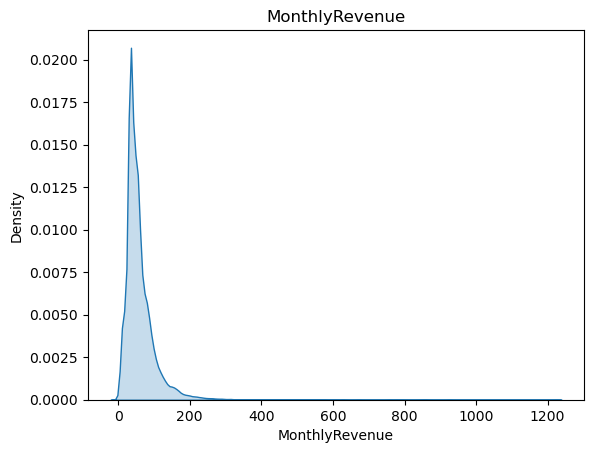

In [192]:
kde_plot(df_cleaned,'MonthlyRevenue',"MonthlyRevenue")

**This column is right skewed "positively skewed".**

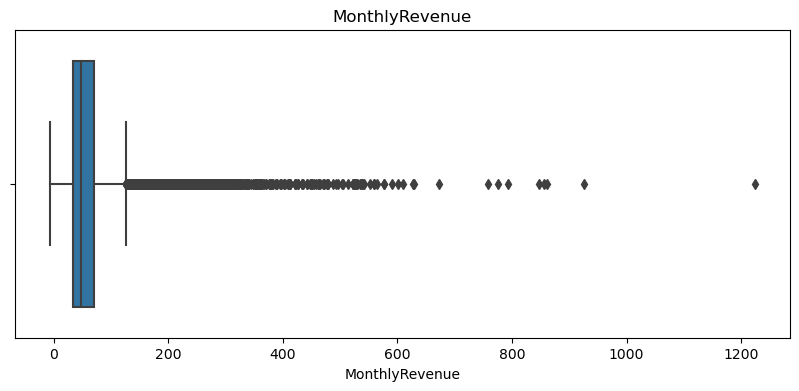

In [200]:
box_plot(df_cleaned['MonthlyRevenue'], df_cleaned,'MonthlyRevenue' )

In [38]:
def IQR (df, column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    IQR= q3-q1
    cut_off= IQR*1.5
    lower=q1-cut_off
    upper=q3+cut_off
    df_IQR= df[(df[column]>lower)&(df[column]<upper)]
    return df_IQR.shape

**We've chose the IQR method as the data is skewed.**

**This function outputs the shape of the dataframe without detected outliers.**



In [39]:
IQR(df_cleaned, 'MonthlyRevenue')

(48017, 49)

**We've around 3000 outliers '51023-48017'.**

In [40]:
#handling outliers
def handle_outliers (df, column):
    #df_clean = df.copy()
    median =df[column].median()
    if df[column].skew() > -1 and df[column].skew() < 1:  
        cutoff_pos = df[column].mean() + df[column].std() * 3
        cutoff_neg = df[column].mean() - df[column].std() * 3
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        cutoff_neg = Q1 - 1.5 * IQR
        cutoff_pos = Q3 + 1.5 * IQR
               
    condition_series = ((df[column] > cutoff_pos) | (df[column]< cutoff_neg))
    #df_clean[column] = np.where(condition_series, median,df_clean[column])
    df[column] = np.where(condition_series, median,df[column])
    #print(column)
    return df

In [41]:
df_no_outliers=handle_outliers (df_cleaned, "MonthlyRevenue")

In [42]:
test_no_outliers=handle_outliers (test_cleaned, "MonthlyRevenue")

In [43]:
df_no_outliers['MonthlyRevenue'].describe()

count    51023.000000
mean        50.662568
std         24.387848
min         -6.170000
25%         33.660000
50%         48.460000
75%         62.510000
max        126.900000
Name: MonthlyRevenue, dtype: float64

In [44]:
df_no_outliers['MonthlyRevenue'].skew()

0.8260032213081977

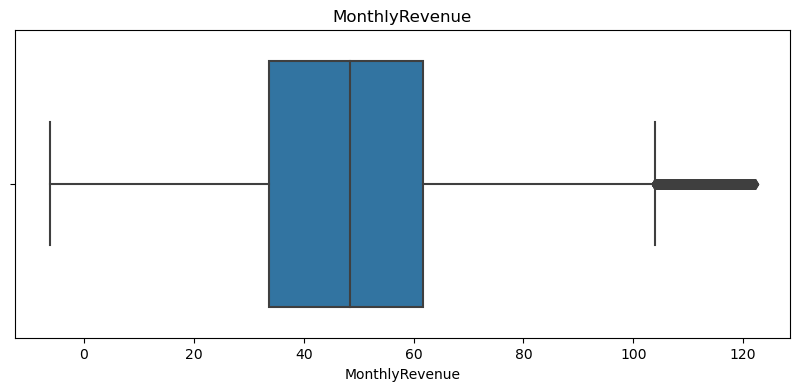

In [217]:
box_plot(df_no_outliers['MonthlyRevenue'], df_no_outliers,'MonthlyRevenue' )

**Perfect!**

**Trying on another column**

In [45]:
df_no_outliers['AgeHH2'].describe()

count    51023.000000
mean        20.764538
std         23.882431
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max         99.000000
Name: AgeHH2, dtype: float64

In [539]:
df_no_outliers['AgeHH2'].skew()

0.5780142963205174

**Ohhhh, normally distributed.**

**Then we'll use the z-score method.**

In [46]:
def z_score(df, column):
    z= np.abs(stats.zscore(df[column]))
    filtered_entries= z<3
    df_zscore= df[filtered_entries]
    #print(df.shape)
    #print(df_zscore.shape)
    return df_zscore.shape

In [47]:
z_score(df_no_outliers, "AgeHH2")

(50991, 49)

**Around 32 outliers.**

In [48]:
df_no_outliers=handle_outliers (df_no_outliers, "AgeHH2")
df_no_outliers['AgeHH2'].describe()

count    51023.000000
mean        20.704271
std         23.813371
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max         92.000000
Name: AgeHH2, dtype: float64

In [49]:
test_no_outliers=handle_outliers (test_no_outliers, "AgeHH2")

#


**Generalizing the outliers detection & handling techniques in a single fumnction.**

In [50]:
def detecting_and_handling_outliers (df, column):
    df_so_clean=df.copy()
    skew= df[column].skew()
    if ((skew>-1)&(skew<1)):
        zscore_shape=z_score(df, column)
#checking if the output shape is equivalent to the df's shape, then there are no outliers, else handle them.
        if (zscore_shape!=df.shape):
            df_so_clean=handle_outliers (df, column)
    else:
        IQR_shape=IQR(df, column) 
        if (IQR_shape!=df.shape):
            df_so_clean=handle_outliers (df, column)
    
     
    return df_so_clean

In [51]:
numeric_columns= df_no_outliers.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    df_clean=detecting_and_handling_outliers(df_no_outliers,column)
    
df_clean.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,TechSavvinessScore
count,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,51023.000000,...,51023.000000,51023.000000,51023.000000,51023.0,51023.0,51023.0,51023.000000,51023.0,51023.000000,51023.000000
mean,0.288086,50.351933,436.512632,45.295867,0.348343,13.492856,0.030043,-7.977344,-1.257243,19.940225,...,357.401152,31.413911,20.704271,0.0,0.0,0.0,4.323874,0.0,12.455951,1.463948
std,0.452876,23.919352,357.607893,20.114142,0.518896,23.143668,0.095002,187.890753,4.980589,18.888348,...,215.767753,21.902386,23.813371,0.0,0.0,0.0,3.138366,0.0,24.465092,0.772014
min,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-781.000000,-19.500000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,33.660000,159.000000,30.000000,0.000000,0.000000,0.000000,-76.000000,-1.500000,5.300000,...,205.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000
50%,0.000000,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,16.300000,...,329.000000,36.000000,0.000000,0.0,0.0,0.0,5.000000,0.0,0.000000,1.000000
75%,1.000000,62.060000,621.000000,60.000000,0.500000,16.000000,0.000000,60.000000,0.000000,28.700000,...,483.000000,48.000000,42.000000,0.0,0.0,0.0,7.000000,0.0,10.000000,2.000000
max,1.000000,123.800000,1566.000000,105.000000,2.310000,100.000000,0.500000,757.000000,14.100000,82.700000,...,980.000000,96.000000,92.000000,0.0,0.0,0.0,9.000000,0.0,100.000000,3.000000


**By comparing this with previous description, we can easily notice the huge difference.**

**And by this, we've dealt with the outliers in all of our numerical columns.**

In [57]:
numeric_columns= test_no_outliers.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    test_clean=detecting_and_handling_outliers(test_no_outliers,column)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


#



# 7- Data Transformation (Encoding & Discretization).

## Encoding

**We'll strart by label encoding the boolean columns as they have two values only even if they aren't ordinal.**

**Churn is already encoded.**

In [52]:
object_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
  
# Filter object columns with only 'No' or 'Yes' values
boolean_object_cols = [col for col in object_cols if df_clean[col].isin(['No', 'Yes']).all()]
boolean_object_cols

['ChildrenInHH',
 'HandsetRefurbished',
 'BuysViaMailOrder',
 'OptOutMailings',
 'NonUSTravel',
 'HasCreditCard',
 'NewCellphoneUser',
 'MadeCallToRetentionTeam',
 'VehicleOwner']

In [54]:
def label_encoding(df,column):
    result=df.copy()
    if (result.dtypes[column]==object): #categorical column
        le=preprocessing.LabelEncoder()
        result[column]=le.fit_transform(result[column])
    return result

In [55]:
encoded_data = df_clean.copy()
for column in boolean_object_cols:

    encoded_data[column] = label_encoding(encoded_data, column)[column]
encoded_data.head(7)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,VehicleOwner,TechSavvinessScore
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,6.3,...,4,0.0,30.0,1,1-Highest,Suburban,Professional,No,0,3
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,2.7,...,5,0.0,30.0,0,4-Medium,Suburban,Professional,Yes,0,2
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,6,0.0,0.0,0,3-Good,Town,Crafts,Yes,0,0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,76.0,...,6,0.0,10.0,0,4-Medium,Other,Other,No,0,2
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,9,0.0,10.0,0,1-Highest,Other,Professional,Yes,0,2
5,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,13.0,...,1,0.0,30.0,0,3-Good,Other,Other,Yes,0,1
6,0,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,2.3,...,9,0.0,30.0,0,1-Highest,Other,Self,Yes,0,2


In [59]:
encoded_test = test_clean.copy()

for column in boolean_object_cols:

    encoded_test[column] = label_encoding(encoded_test, column)[column]

In [60]:
object_cols = encoded_data.select_dtypes(include=['object']).columns.tolist()
object_cols

['ServiceArea',
 'Homeownership',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

**These are the remaining categorical columns.**

In [744]:
for col in object_cols:
    print(col, encoded_data[col].nunique())

ServiceArea 747
Homeownership 2
CreditRating 7
PrizmCode 4
Occupation 8
MaritalStatus 3


In [745]:
encoded_data['Homeownership'].unique()

array(['Known', 'Unknown'], dtype=object)

In [746]:
encoded_data['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

**Homeownership also has two unique values only, and for the CreditRating, it's pretty obvious that the values are ordinal, however, instead of label encoding it we can simply split the values at the '-'.**

In [61]:
encoded_data= label_encoding(encoded_data, "Homeownership")

In [62]:
encoded_test= label_encoding(encoded_test, "Homeownership")

In [63]:
encoded_data['CreditRating'] = encoded_data['CreditRating'].apply(lambda x: x.split('-')[0])

# Converting column to numeric type
encoded_data['CreditRating'] = pd.to_numeric(encoded_data['CreditRating'])

In [64]:
encoded_test['CreditRating'] = encoded_test['CreditRating'].apply(lambda x: x.split('-')[0])

# Converting column to numeric type
encoded_test['CreditRating'] = pd.to_numeric(encoded_test['CreditRating'])

In [65]:
encoded_data[['Homeownership', 'CreditRating']].head()

,Homeownership,CreditRating
0,0,1
1,0,4
2,1,3
3,0,4
4,0,1


In [66]:
object_cols = encoded_data.select_dtypes(include=['object']).columns.tolist()
object_cols

['ServiceArea', 'PrizmCode', 'Occupation', 'MaritalStatus']

#

**Moving to the rest, they all contain more than two unique values, therefore we'll only one-hot encode with the top 3 categories.**

In [67]:
# func that calculates the top x most frequent values in a categorical feature.
# inputs, dataframe(df), feature/column name (variable) and top x values(how_many)
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]
# manually encode the most frequent values in a catgeorical feature.
def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0) 

In [ ]:
df_copy = encoded_data.copy()
columns= df_copy[['ServiceArea','Occupation','PrizmCode','MaritalStatus']]
for col in columns:
    top_x = calculate_top_categories(df_copy,col,3)
    one_hot_encode(df_copy,col,top_x)

In [ ]:
df_copy.drop(['ServiceArea','Occupation','PrizmCode','MaritalStatus'], axis=1, inplace=True)
df_copy.sample(7)

**Update: I won't run the above 3 cells, and will alter to 'Target Encoder' for the sake of dimensionaity reduction.**

#


In [37]:
!pip install category_encoders


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/81.9 kB 563.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 507.9 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [68]:
from category_encoders import TargetEncoder

df_copy = encoded_data.copy()
encoder = TargetEncoder()

columns= df_copy[['ServiceArea','Occupation','PrizmCode','MaritalStatus']]
for col in columns:
    df_copy[col] = encoder.fit_transform(df_copy[col], df_copy['Churn'])

    

In [69]:
test_copy = encoded_test.copy()

columns= test_copy[['ServiceArea','Occupation','PrizmCode','MaritalStatus']]
for col in columns:
    test_copy[col] = encoder.fit_transform(test_copy[col], test_copy['Churn'])

In [70]:
object_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
object_cols

[]

**Doneee**

#

# 8- Discretization & Lookup Table.

In [92]:
df_copy.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'Hands

**Since we're done with imputing the missing values and encoding the categorical columns, we'll create a lookup table to map the original values to the imputed/encoded ones.**

**After that, we'll perform equal frequency discretisation by spreading the values of the observations of some columns more evenly as it may help boost any algorithm's performance.**

In [71]:
def create_lookup_tables(df, df_copy, df_new, label_encoded_columns, imputed_columns):
    lookup_tables = []

    # Creating lookup tables for label-encoded columns
    for column in label_encoded_columns:
        lookup_table = pd.DataFrame({
            'Column_name': [column] * df[column].nunique(),
            'Original_Value': df[column].unique(),
            'Encoded_Value': df_copy[column].unique()
        })
        lookup_tables.append(lookup_table)

    # Creating lookup tables for imputed columns
    for column in imputed_columns:
        imputed_value = df_new[column].dropna().median()
        lookup_table = pd.DataFrame({
            'Column_name': [column],
            'Original_Value': ["null"],
            'Imputed_Value': [imputed_value]
        })
        lookup_tables.append(lookup_table)

    return lookup_tables

def discretize_and_create_lookup(df, df_copy, df_new, columns_to_discretize, label_encoded_columns, imputed_columns, num_bins=4):
    lookup_tables = create_lookup_tables(df, df_copy, df_new, label_encoded_columns, imputed_columns)

    discretized_df = df_copy.copy()
    discretized_test = test_copy.copy()
    

    # Discretize the specified columns and create lookup tables for them
    for column in columns_to_discretize:
        # Handle duplicate bin edges by setting duplicates='drop'
        discretized_df[column], bins = pd.qcut(discretized_df[column], q=num_bins, labels=False, retbins=True, duplicates='drop')
        discretized_test[column], bins = pd.qcut(discretized_test[column], q=num_bins, labels=False, retbins=True, duplicates='drop')
        
        
        labels = list(range(len(bins) - 1))
        discretized_df[column] = discretized_df[column].map(lambda x: labels[int(x)] if pd.notna(x) else x)
        discretized_test[column] = discretized_test[column].map(lambda x: labels[int(x)] if pd.notna(x) else x)
        

        lookup_table = pd.DataFrame({
            'Column_name': [column] * (len(bins) - 1),
            'Original_Value': [f'({bins[i]:.2f}, {bins[i + 1]:.2f}]' for i in range(len(bins) - 1)],
            'Disc_Value': labels
        })

        lookup_tables.append(lookup_table)

    

    # Concatenate all lookup tables into a single table
    final_lookup_table = pd.concat(lookup_tables, ignore_index=True)
    return discretized_df, discretized_test, final_lookup_table

#we've choose these columns as they have high variance
columns_to_discretize = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge'
]

imputed_columns = [
    'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues']

label_encoded_columns = [
    'ChildrenInHH', 'HandsetRefurbished', 'BuysViaMailOrder', 'OptOutMailings', 
    'NonUSTravel', 'HasCreditCard', 'NewCellphoneUser', 'MadeCallToRetentionTeam', 'Homeownership'
]


discretized_data,discretized_test, final_lookup_table = discretize_and_create_lookup(df, df_copy, df_new, columns_to_discretize, label_encoded_columns, imputed_columns)

print(discretized_data.head())
#print(final_lookup_table)


   Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0      1               0               1                     0   
1      1               0               0                     0   
2      0               1               0                     1   
3      0               3               3                     3   
4      1               0               0                     0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  UnansweredCalls  ...  IncomeGroup  \
0               -19.0              6.3  ...            4   
1                 0.

In [72]:
discretized_test.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,VehicleOwner,TechSavvinessScore
0,NaN,2,2,1,0.25,23.0,0.0,532.0,-0.3,61.3,...,5,0.0,150.0,0,5,NaN,NaN,NaN,1,3.0
1,NaN,2,2,3,0.00,0.0,0.0,38.0,0.0,77.0,...,6,0.0,80.0,0,1,NaN,NaN,NaN,0,2.0
2,NaN,3,3,2,0.25,2.0,0.0,198.0,-0.3,16.3,...,4,0.0,10.0,0,3,NaN,NaN,NaN,0,0.0
3,NaN,1,0,0,0.00,16.0,0.0,30.0,7.3,17.3,...,4,0.0,0.0,0,1,NaN,NaN,NaN,1,2.0
4,NaN,2,3,2,0.74,0.0,0.0,169.0,1.0,43.7,...,3,0.0,10.0,0,1,NaN,NaN,NaN,0,2.0


In [73]:
final_lookup_table

,Column_name,Original_Value,Encoded_Value,Imputed_Value,Disc_Value
0,ChildrenInHH,No,0.0,NaN,NaN
1,ChildrenInHH,Yes,1.0,NaN,NaN
2,HandsetRefurbished,No,0.0,NaN,NaN
3,HandsetRefurbished,Yes,1.0,NaN,NaN
4,BuysViaMailOrder,Yes,1.0,NaN,NaN
5,BuysViaMailOrder,No,0.0,NaN,NaN
6,OptOutMailings,No,0.0,NaN,NaN
7,OptOutMailings,Yes,1.0,NaN,NaN
8,NonUSTravel,No,0.0,NaN,NaN
9,NonUSTravel,Yes,1.0,NaN,NaN


#

# 9- Standardization & Normalization

**We'll use the z-score scaling, which will scale any attribute values with zero mean and unit standard deviation.**

**We do this as some ML algorithms, such as support vector machines (SVM), k-nearest neighbors (KNN) are based on measures of how far apart data points are**

**Let's try it on a single column first.**

In [74]:
def standardize(df, column):
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df

In [75]:
df_scaled=discretized_data.copy()
df_scaled.sample(7)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,VehicleOwner,TechSavvinessScore
4517,0,1,2,1,0.00,0.0,0.0,265.0,-6.4,14.7,...,7,0.0,0.0,0,3,0.281290,0.290339,0.270922,0,0
34556,0,0,1,1,0.00,0.0,0.0,-11.0,0.0,0.0,...,0,0.0,0.0,0,4,0.316550,0.290339,0.301787,0,1
8445,0,2,2,2,0.25,0.0,0.0,12.0,-0.2,42.0,...,5,0.0,0.0,0,1,0.286166,0.293103,0.285293,0,3
32144,0,2,2,2,0.00,0.0,0.0,-202.0,4.5,20.0,...,6,0.0,0.0,0,5,0.286166,0.290339,0.301787,0,1
25456,0,0,0,0,0.00,0.0,0.0,-5.0,0.4,0.0,...,1,0.0,30.0,0,1,0.286166,0.252732,0.270922,0,1
33916,0,0,1,1,0.25,4.0,0.0,-72.0,-2.0,0.0,...,6,0.0,0.0,0,3,0.281290,0.290339,0.270922,0,1
32124,0,2,1,1,0.00,59.0,0.0,251.0,-0.3,21.7,...,4,0.0,60.0,0,5,0.281290,0.290339,0.270922,0,1


In [76]:
test_scaled=discretized_test.copy()


In [690]:
standardize(df_scaled,'PercChangeMinutes')

,Churn,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,...,Occupation_Crafts,PrizmCode_Other,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,MaritalStatus_No,MonthlyRevenue_Binned,MonthlyMinutes_Binned,TotalRecurringCharge_Binned
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,0.25,0.0,0.0,-0.793142,-19.0,6.3,0.0,0.0,97.2,...,0,0,1,0,0,0,1,0,1,0
3000010,1,0.00,0.0,0.0,0.021169,0.0,2.7,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3000014,0,0.00,0.0,0.0,0.031813,0.0,0.0,0.0,0.0,0.4,...,1,0,0,1,0,1,0,1,0,1
3000022,0,1.24,0.0,0.0,0.878058,8.1,76.0,0.0,0.0,200.3,...,0,1,0,0,0,0,1,3,3,3
3000026,1,0.00,0.0,0.0,0.042458,-0.2,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1,0.25,3.0,0.0,0.015846,-0.3,48.3,0.0,0.0,58.9,...,0,0,1,0,0,1,0,1,1,1
3399974,0,0.99,45.0,0.0,0.691778,-0.3,41.3,0.0,0.0,52.7,...,0,1,0,0,0,0,1,3,1,3
3399978,1,0.25,3.0,0.0,0.015846,-0.3,16.3,1.3,0.0,52.7,...,0,1,0,0,0,0,1,1,1,1


In [140]:
standardize(test_scaled,'PercChangeMinutes')

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,NaN,2,2,1,0.25,23.0,0.0,2.904679,-0.3,8.3,...,0.0,5,No,0.0,150.0,No,5,NaN,NaN,NaN
1,NaN,2,2,3,0.00,0.0,0.0,0.244902,0.0,9.7,...,0.0,6,No,0.0,80.0,No,1,NaN,NaN,NaN
2,NaN,3,3,2,0.25,2.0,0.0,1.106368,-0.3,12.7,...,0.0,4,No,0.0,10.0,No,3,NaN,NaN,NaN
3,NaN,1,0,0,0.00,16.0,0.0,0.201828,7.3,2.0,...,0.0,4,No,0.0,0.0,No,1,NaN,NaN,NaN
4,NaN,2,3,2,0.74,0.0,0.0,0.950227,1.0,2.7,...,0.0,3,No,0.0,10.0,No,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,3,3,3,0.00,1.0,0.4,0.040303,0.0,12.0,...,0.0,0,No,0.0,40.0,No,1,NaN,NaN,NaN
19996,NaN,1,1,1,0.25,2.0,0.0,0.018767,-0.3,0.0,...,0.0,6,No,0.0,0.0,No,1,NaN,NaN,NaN
19997,NaN,1,1,1,0.25,2.0,0.0,0.018767,-0.3,0.0,...,0.0,8,No,0.0,0.0,No,1,NaN,NaN,NaN
19998,NaN,1,1,1,0.25,2.0,0.0,0.018767,-0.3,3.0,...,0.0,3,No,0.0,150.0,No,3,NaN,NaN,NaN


**We can already see the difference.**

In [691]:
print("Minimum ", min(df_scaled['PercChangeMinutes']))
print("Maximum ", max(df_scaled['PercChangeMinutes']))

Minimum  -4.114253742559351
Maximum  4.071434223073158


C:\Users\2018\AppData\Local\Temp\ipykernel_2168\1439743686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_column, ax=ax[0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\2018\AppData\Local\Temp\ipykernel_2168\1439743686.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fl

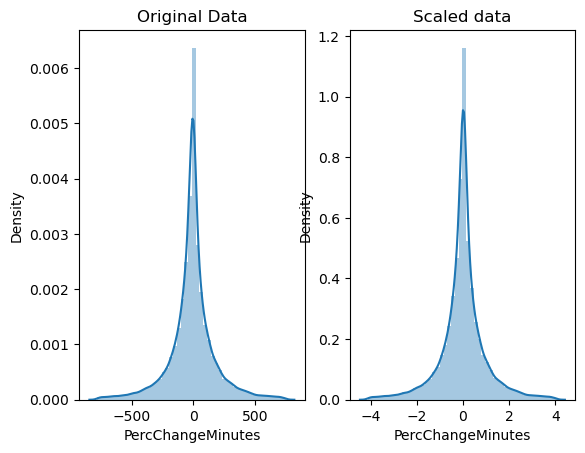

In [693]:
def plt_scaled_column (original_column, scaled_column):    
    fig, ax=plt.subplots(1,2)
    sns.distplot(original_column, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(scaled_column, ax=ax[1])
    ax[1].set_title("Scaled data")
    plt.show()
    
plt_scaled_column(discretized_data['PercChangeMinutes'],df_scaled['PercChangeMinutes'])

**That was pretty cool!!**

**Regarding the normalization, it's crucial when using an ML technique that assumes my data is normally distributed. And our second notebook is ALL about data modelling :)**

**Now, let's see the effect of normalization on a random column.**

In [77]:
def normalize(df, column):
    result = df.copy()
    skew = result[column].skew()
    
    # Checking whether the column is nearly normally distributed or not.
    if skew < -1 or skew > 1:
        # Ensuring there are no negative or zero values by shifting the entire column
        # by (1 - min_value) to avoid 0 values.
        if result[column].min() <= 0:
            constant_shift = 1 - result[column].min()
            result[column + "_shifted"] = result[column] + constant_shift
            print("Min value after shift:", result[column + "_shifted"].min())
            column_to_transform = column + "_shifted"
        else:
            column_to_transform = column
        
        # Normalizing using the Box-Cox transformation.
        normalized_values, _ = stats.boxcox(result[column_to_transform])
        result[column] = normalized_values
        
        # Drop the shifted column after normalization
        result.drop(columns=[column + "_shifted"], inplace=True)
        
        # Plot both together to compare (commented out for now)
        # fig, ax = plt.subplots(1, 2)
        # sns.distplot(df[column], ax=ax[0])
        # ax[0].set_title("Original Data")
        # sns.distplot(normalized_values, ax=ax[1])
        # ax[1].set_title("Normalized data")
        
    return result


Min value after shift: 1.0


C:\Users\2018\AppData\Local\Temp\ipykernel_2168\2167219488.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=ax[0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\2018\AppData\Local\Temp\ipykernel_2168\2167219488.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexi

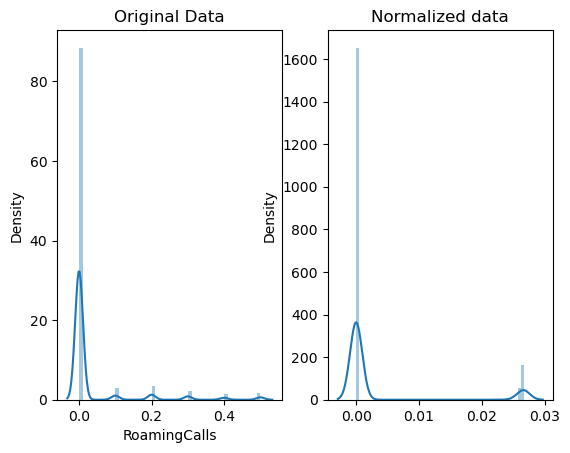

In [695]:
df_normalized=normalize(df_scaled, 'RoamingCalls')

#


**Let's create a generalized method that does both.**

In [95]:
def standardize_and_normalize(df, columns):
    df_new = df.copy()
    for col in columns:
        df_new = standardize(df_new, col)  
        df_new = normalize(df_new, col)
    return df_new


In [92]:
df_scaled=discretized_data.copy()
columns=['DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls',
        'InboundCalls','PeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs',
        'ActiveSubs','Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','HandsetPrice']

df_final=standardize_and_normalize(df_scaled, columns)

Min value after shift: 1.0
Min value after shift: 0.9999999999999999
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 0.9999999999999999
Min value after shift: 1.0
Min value after shift: 0.9999999999999999
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 0.9999999999999998
Min value after shift: 0.9999999999999999
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0


In [81]:
df_final.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,UnansweredCalls,...,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,VehicleOwner,TechSavvinessScore
0,1,0,1,0,0.298676,-1.110223e-16,0.0,-0.793142,-3.562416,0.268872,...,4,0.0,0.301372,1,1,0.281290,0.281729,0.270922,0,3
1,1,0,0,0,0.000000,-1.110223e-16,0.0,0.021169,0.252431,0.129423,...,5,0.0,0.301372,0,4,0.281290,0.281729,0.285293,0,2
2,0,1,0,1,0.000000,-1.110223e-16,0.0,0.031813,0.252431,0.000000,...,6,0.0,0.000000,0,3,0.299895,0.280632,0.285293,0,0
3,0,3,3,3,0.567282,-1.110223e-16,0.0,0.878058,1.878761,1.124026,...,6,0.0,0.213409,0,4,0.286166,0.290339,0.270922,0,2
4,1,0,0,0,0.000000,-1.110223e-16,0.0,0.042458,0.212275,0.000000,...,9,0.0,0.213409,0,1,0.286166,0.281729,0.285293,0,2


In [96]:
test_scaled=discretized_test.copy()
columns=['DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls',
        'InboundCalls','PeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs',
        'ActiveSubs','Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','HandsetPrice']

test_final=standardize_and_normalize(test_scaled, columns)

Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 0.9999999999999999
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 0.9999999999999998
Min value after shift: 1.0000000000000002
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0
Min value after shift: 1.0


In [98]:
test_final=test_final.drop('Churn',axis=1)

**BINGOOOO!**

**And by this we're DONE.**

#

# 10- Data Export

In [82]:
df_final=df_final.to_csv(r'D:\Telecom Customer Churn\cleaned_train_data.csv', index=False)

In [99]:
test_final=test_final.to_csv(r'D:\Telecom Customer Churn\test_data.csv', index=False)

In [100]:
final_lookup_table.to_csv(r'D:\Telecom Customer Churn\Lookup_table.csv', index=False)

**For the sake of compression, here's the data in parquet format.**

In [93]:
#!pip install pyarrow
df_finalll=df_final.copy()
df_finalll.to_parquet(r'D:\Telecom Customer Churn\cleaned_train_data.parquet', index=False)

In [97]:
test_finalll=test_final.copy()
test_finalll.to_parquet(r'D:\Telecom Customer Churn\test_data.parquet', index=False)